In [ ]:
import sys
import stylishplot

sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

import emulatte as emu
from emulatte.source import VMD, CircularLoop
from emulatte.halfspace import analytical

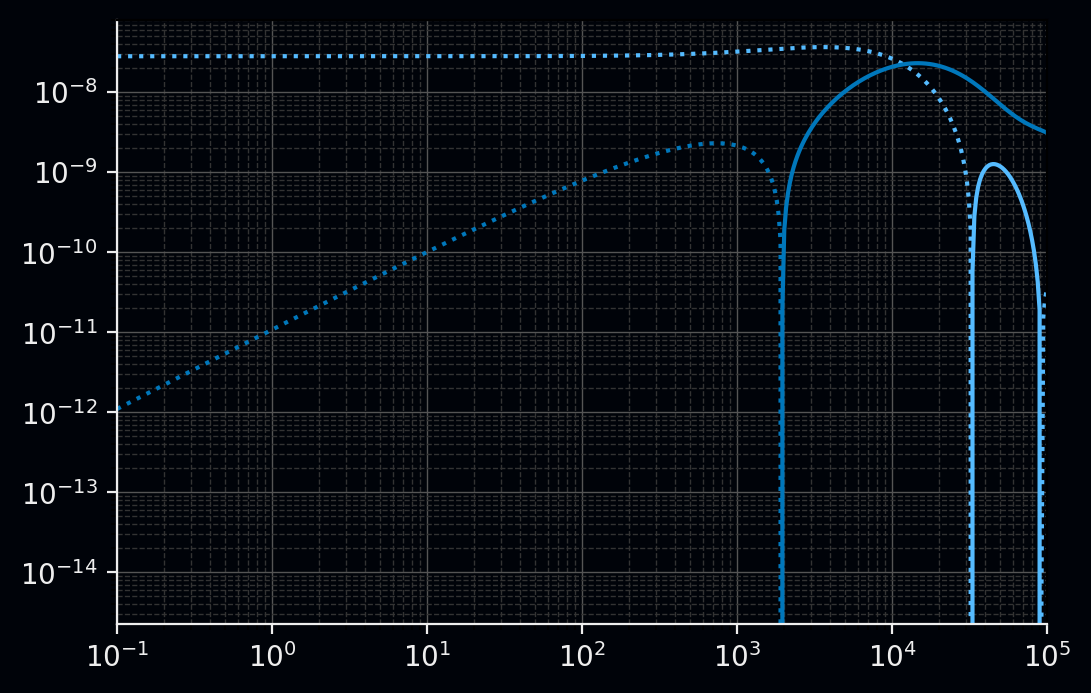

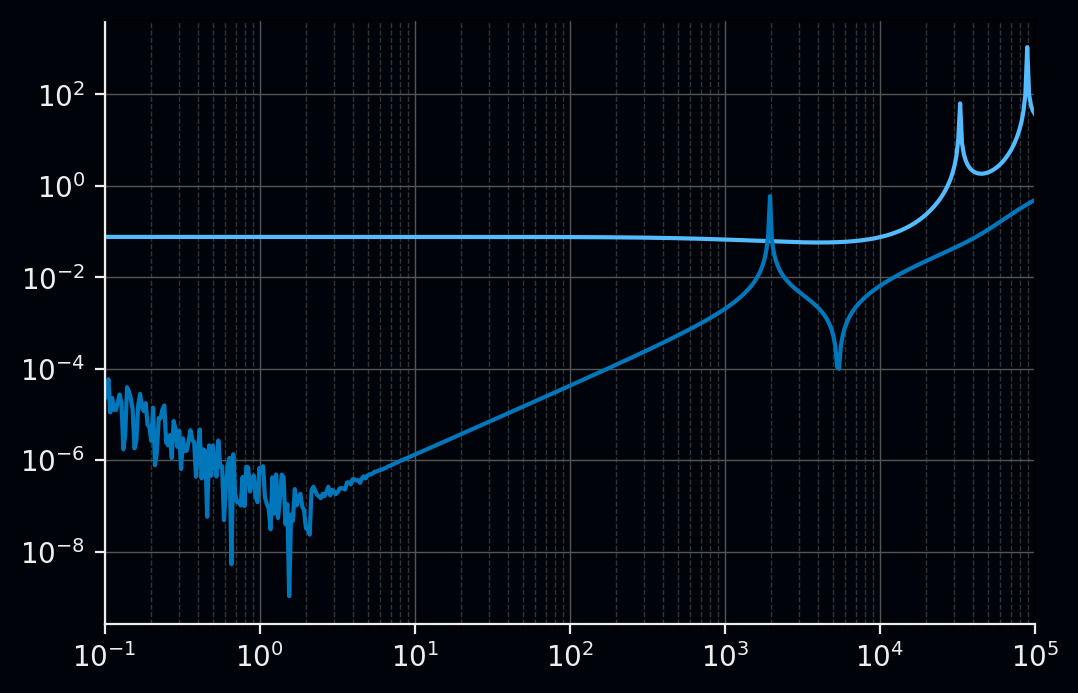

In [14]:
thick = []
res = [100]
freq = np.logspace(-1, 5, 500)
src = [0, 0, 0]
rec = [100, 100, 0]

vmd = VMD(1)
model = emu.create_model(thick, state="unsteady")
model.set_params(res)
model.set_source(vmd, src)
hz, = model.fdem("H", "z", rec, freq)

fig = stylishplot.fdem_plot(freq, hz)
plt.show()

hz_ideal = analytical.SurfaceVMD(res[0], rec[:2]).fdem_hz(freq)
fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()


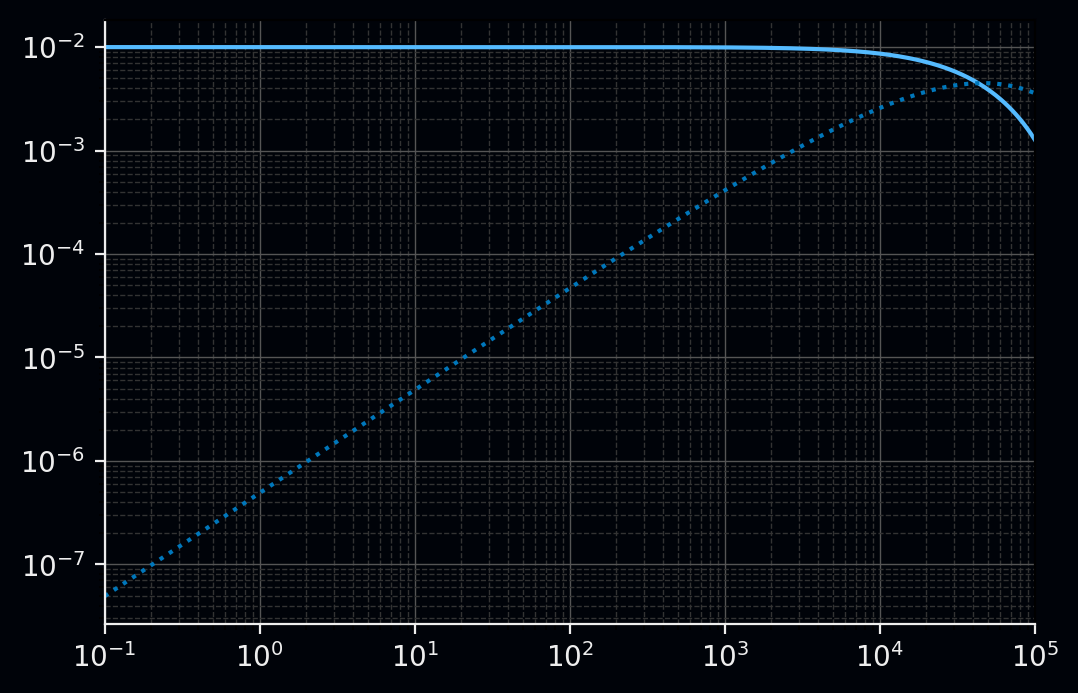

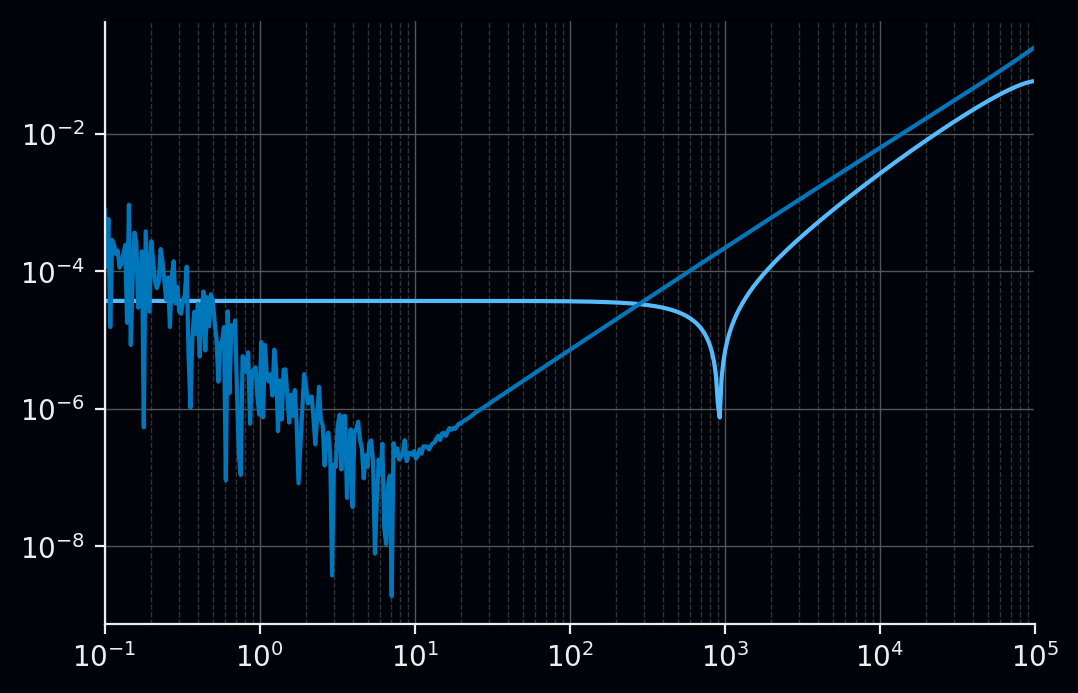

In [15]:
thick = []
res = [100]
freq = np.logspace(-1, 5, 500)
src = [0, 0, 0]
rec = [0, 0, 0]
rad = 50
current = 1

crl = CircularLoop(current, rad)
model = emu.create_model(thick, state="unsteady")
model.set_params(res)
model.set_source(crl, src)
hz, = model.fdem("H", "z", rec, freq)

fig = stylishplot.fdem_plot(freq, hz)
plt.show()

hz_ideal = analytical.SurfaceCircularLoop(res[0], rad).fdem_central_hz(freq)
fig = stylishplot.fdem_rel_error_plot(freq, hz, hz_ideal)
plt.show()

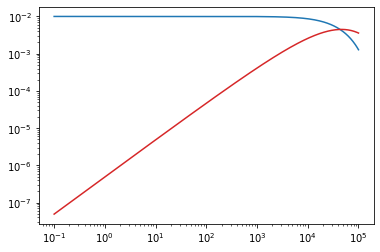

In [16]:
from emulatte.halfspace import analytical

res = 100
radius = 50
hz_ideal = analytical.SurfaceCircularLoop(res, radius).fdem_central_hz(freq)
plt.loglog(freq, hz_ideal.real)
plt.loglog(freq, -hz_ideal.real)
plt.loglog(freq, hz_ideal.imag)
plt.loglog(freq, -hz_ideal.imag)